# Day 6: Agenda

- Data Analytics round-up
- Machine Learning
- Revision
- Eval

### Olympics medals

Observtions
1. 



In [1]:
import pandas as pd

In [2]:
olympics = pd.read_csv('data/olympic_medals.csv')
olympics

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
...,...,...,...,...,...,...,...,...,...,...
29211,Beijing,2008,Wrestling,Wrestling Gre-R,"ENGLICH, Mirko",GER,Men,84 - 96kg,M,Silver
29212,Beijing,2008,Wrestling,Wrestling Gre-R,"MIZGAITIS, Mindaugas",LTU,Men,96 - 120kg,M,Bronze
29213,Beijing,2008,Wrestling,Wrestling Gre-R,"PATRIKEEV, Yuri",ARM,Men,96 - 120kg,M,Bronze
29214,Beijing,2008,Wrestling,Wrestling Gre-R,"LOPEZ, Mijain",CUB,Men,96 - 120kg,M,Gold


In [3]:
olympics.describe()

,Edition
count,29216.000000
mean,1967.713171
std,32.406293
min,1896.000000
25%,1948.000000
50%,1976.000000
75%,1996.000000
max,2008.000000


In [4]:
olympics.dtypes

City            object
Edition          int64
Sport           object
Discipline      object
Athlete         object
NOC             object
Gender          object
Event           object
Event_gender    object
Medal           object
dtype: object

In [5]:
olympics.describe(include=['object'])

,City,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
count,29216,29216,29216,29216,29216,29216,29216,29216,29216
unique,22,42,56,21413,138,2,577,3,3
top,Athens,Aquatics,Athletics,"LATYNINA, Larisa",USA,Men,football,M,Gold
freq,2149,3828,3448,18,4335,21721,1387,20067,9850


In [6]:
olympics.Event_gender.unique()

array(['M', 'X', 'W'], dtype=object)

In [7]:
o = olympics

In [9]:
# 1. Total number of golds, silvers & bronzes
o.Medal.value_counts()
o.groupby('Medal').size()

Medal
Bronze    9689
Gold      9850
Silver    9677
dtype: int64

In [10]:
# 2. Total medal tally by Country
o.groupby(['NOC', 'Medal']).size()

NOC  Medal 
AFG  Bronze     1
AHO  Silver     1
ALG  Bronze     8
     Gold       4
     Silver     2
               ..
ZIM  Gold      18
     Silver     4
ZZX  Bronze    10
     Gold      23
     Silver    15
Length: 334, dtype: int64

In [11]:
o.groupby(['Medal', 'NOC']).size()

Medal   NOC
Bronze  AFG      1
        ALG      8
        ANZ      5
        ARG     88
        ARM      7
              ... 
Silver  VIE      2
        YUG    174
        ZAM      1
        ZIM      4
        ZZX     15
Length: 334, dtype: int64

In [15]:
# 3. Medal Tally for India over the years
# 3a. Only India data
# 3b. Medal tally

o[o.NOC == 'IND'].groupby(['Edition', 'Medal']).size()

Edition  Medal 
1900     Silver     2
1928     Gold      15
1932     Gold      11
1936     Gold      19
1948     Gold      20
1952     Bronze     1
         Gold      14
1956     Gold      17
1960     Silver    13
1964     Gold      15
1968     Bronze    15
1972     Bronze    14
1980     Gold      16
1996     Bronze     1
2000     Bronze     1
2004     Silver     1
2008     Bronze     2
         Gold       1
dtype: int64

In [19]:
len(o.value_counts().index.levels)

10

In [21]:
o.value_counts(['NOC','Medal'])

NOC  Medal 
USA  Gold      2088
     Silver    1195
     Bronze    1052
URS  Gold       838
     Silver     627
               ... 
DJI  Bronze       1
DOM  Bronze       1
     Silver       1
PUR  Silver       1
AFG  Bronze       1
Length: 334, dtype: int64

In [17]:
o.NOC.value_counts()

USA    4335
URS    2049
GBR    1594
FRA    1314
ITA    1228
       ... 
BDI       1
IRQ       1
BAR       1
SUD       1
UAE       1
Name: NOC, Length: 138, dtype: int64

In [23]:
tally = o.value_counts(['NOC', 'Edition', 'Gender', 'Medal'])
tally

NOC  Edition  Gender  Medal 
GBR  1908     Men     Gold      140
USA  1904     Men     Gold      140
                      Silver    133
GBR  1908     Men     Silver    131
URS  1980     Men     Gold      129
                               ... 
NZL  1964     Women   Bronze      1
              Men     Bronze      1
     1960     Men     Bronze      1
     1952     Women   Gold        1
AFG  2008     Men     Bronze      1
Length: 3252, dtype: int64

In [34]:
# India data
tally['IND']

# India data for 2008
tally['IND', 2008]

# Range/slice lookup??
# tally.loc['IND', 1964:2008]

Gender  Medal 
Men     Bronze    2
        Gold      1
dtype: int64

## Machine Learning

In [37]:
mpg = pd.read_csv('data/auto-mpg.csv')
mpg

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,US,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,US,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,US,ford ranger


In [38]:
mpg.dtypes

mpg       float64
cyl         int64
displ     float64
hp          int64
weight      int64
accel     float64
yr          int64
origin     object
name       object
dtype: object

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
mpg.drop(['name', 'origin'], axis='columns')

,mpg,cyl,displ,hp,weight,accel,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82
388,44.0,4,97.0,52,2130,24.6,82
389,32.0,4,135.0,84,2295,11.6,82
390,28.0,4,120.0,79,2625,18.6,82


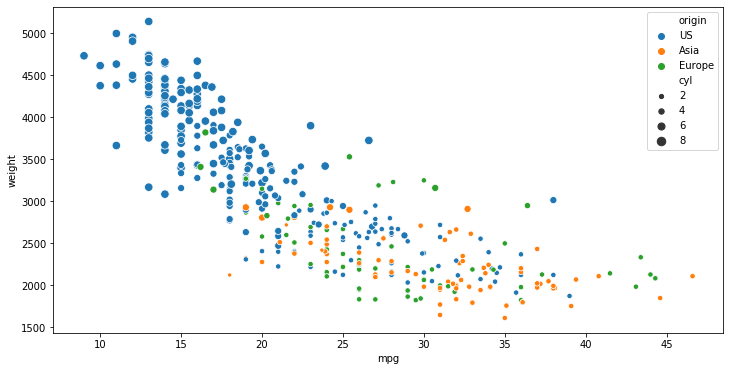

In [48]:
plt.figure(figsize=(12,6))
# sns.scatterplot(mpg['mpg'], mpg['weight'], hue=mpg['origin'])
sns.scatterplot(x='mpg', y='weight', hue='origin', size='cyl', data=mpg)

In [49]:
import sklearn
import sklearn as skl

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [63]:
y = mpg['origin']

# mpg.drop(['name', 'origin'], axis='columns')

input_cols = 'mpg	cyl	displ	hp	weight	accel	yr'.split()
X = mpg[input_cols]

In [58]:
X

,mpg,cyl,displ,hp,weight,accel,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82
388,44.0,4,97.0,52,2130,24.6,82
389,32.0,4,135.0,84,2295,11.6,82
390,28.0,4,120.0,79,2625,18.6,82


In [64]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [65]:
ypred = knn.predict(X)

In [66]:
ypred

array(['US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'Asia', 'US', 'US', 'US', 'Asia', 'Europe',
       'Europe', 'Asia', 'Asia', 'Europe', 'US', 'US', 'US', 'US', 'US',
       'Asia', 'Asia', 'Europe', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'Asia',
       'Asia', 'Asia', 'Asia', 'Asia', 'Europe', 'Asia', 'Asia', 'US',
       'Asia', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'Asia', 'US', 'US', 'US', 'US', 'Europe', 'Asia', 'Europe',
       'Europe', 'US', 'Asia', 'Asia', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US', 'US',
       'US', 'US', 'Asia', 'US', 'US', 'US', 'US', 'US', 'Asia', 'US',
       'Asia', 'Asia', 'US', 'US', 'Asia', 'US', 'US', 'Asia', 'US', 'US',
       'US', 'US', 'Europe', 'Asia', 'US', 'US', 'US', 'US', 'Asia',
       'Asia', 'Europe', 'US', 'US', 'US', 'US', 'US'

In [67]:
y

0          US
1          US
2          US
3          US
4          US
        ...  
387        US
388    Europe
389        US
390        US
391        US
Name: origin, Length: 392, dtype: object

In [70]:
# Converting np.array to Series
ypred = pd.Series(ypred)
ypred

0          US
1          US
2          US
3          US
4          US
        ...  
387        US
388    Europe
389        US
390        US
391      Asia
Length: 392, dtype: object

In [74]:
(y == ypred).value_counts() / len(y) * 100

True     82.142857
False    17.857143
dtype: float64

In [81]:
(y == ypred).sum()

322

In [78]:
sum(range(10))
sum([True, False, True])
sum([1,0,1])

2

In [80]:
int(True)
int(False)

0

In [82]:
sum([1,2,3])

6

## Data Splitting

- Training Data
- Test Data
- _Validation Data_

In [123]:
def split(X, y, frac=.8):
    ntrain = round(len(X) * frac)
    
    Xtrain = X[:ntrain]
    Xtest = X[ntrain:]
    
    ytrain = y[:ntrain]
    ytest = y[ntrain:]
    
    return Xtrain, Xtest, ytrain, ytest

In [108]:
ntrain = round(len(X) * .8)
ntrain

314

In [109]:
Xtrain = X[:ntrain]
Xtest = X[ntrain:]

In [110]:
ytrain = y[:ntrain]
ytest = y[ntrain:]

In [111]:
len(Xtrain)

314

In [112]:
len(Xtest)

78

In [118]:
def train(Xtrain, ytrain):
    knn = KNeighborsClassifier()
    knn.fit(Xtrain, ytrain)
    
    return knn

In [113]:
knn = KNeighborsClassifier()
knn.fit(Xtrain, ytrain)
ypred = knn.predict(Xtest)

In [120]:
def evaluate(model, Xtest, ytest):
    ypred = knn.predict(Xtest)
    return (ytest==ypred).sum()/len(ytest)*100

In [114]:
(ytest==ypred).sum()/len(ytest)*100

57.692307692307686

In [129]:
X.sample(frac=.8)

,mpg,cyl,displ,hp,weight,accel,yr
297,27.2,4,141.0,71,3190,24.8,79
94,12.0,8,455.0,225,4951,11.0,73
325,36.4,5,121.0,67,2950,19.9,80
160,15.0,6,258.0,110,3730,19.0,75
89,12.0,8,429.0,198,4952,11.5,73
...,...,...,...,...,...,...,...
168,23.0,4,140.0,78,2592,18.5,75
271,23.9,4,119.0,97,2405,14.9,78
86,13.0,8,350.0,145,3988,13.0,73
256,20.6,6,231.0,105,3380,15.8,78


In [138]:
def main():
    Xtrain, Xtest, ytrain, ytest = tts(X, y, train_size=.7)
    knn = train(Xtrain, ytrain)
    acc = evaluate(knn, Xtest, ytest)
    print(acc)

In [139]:
main()

77.96610169491525


In [130]:
def split(X, y, frac=.8):
    Xtrain = X.sample(frac=frac)
    Xtest = X.sample(frac=1-frac)
    
    ytrain = y.sample(frac=frac)
    ytest = y.sample(frac=1-frac)
    
    return Xtrain, Xtest, ytrain, ytest

In [131]:
split(X,y)

(      mpg  cyl  displ   hp  weight  accel  yr
 205  20.0    4  130.0  102    3150   15.7  76
 243  36.1    4   98.0   66    1800   14.4  78
 88   15.0    8  318.0  150    3777   12.5  73
 65   17.0    8  304.0  150    3672   11.5  72
 235  30.5    4   98.0   63    2051   17.0  77
 ..    ...  ...    ...  ...     ...    ...  ..
 382  26.0    4  156.0   92    2585   14.5  82
 225  19.0    6  225.0  100    3630   17.7  77
 186  16.0    8  318.0  150    4190   13.0  76
 367  27.0    4  151.0   90    2735   18.0  82
 176  23.0    4  120.0   88    2957   17.0  75
 
 [314 rows x 7 columns],
       mpg  cyl  displ   hp  weight  accel  yr
 130  25.0    4  140.0   75    2542   17.0  74
 30   28.0    4  140.0   90    2264   15.5  71
 84   13.0    8  350.0  175    4100   13.0  73
 320  46.6    4   86.0   65    2110   17.9  80
 194  24.5    4   98.0   60    2164   22.1  76
 ..    ...  ...    ...  ...     ...    ...  ..
 345  34.1    4   91.0   68    1985   16.0  81
 240  21.5    4  121.0  110    26

In [134]:
from sklearn.model_selection import train_test_split as tts

In [137]:
tts(X,y, train_size=0.7)

[      mpg  cyl  displ   hp  weight  accel  yr
 65   17.0    8  304.0  150    3672   11.5  72
 268  21.1    4  134.0   95    2515   14.8  78
 86   13.0    8  350.0  145    3988   13.0  73
 302  37.3    4   91.0   69    2130   14.7  79
 147  24.0    4  120.0   97    2489   15.0  74
 ..    ...  ...    ...  ...     ...    ...  ..
 181  25.0    4  116.0   81    2220   16.9  76
 334  27.2    4  135.0   84    2490   15.7  81
 76   22.0    4  121.0   76    2511   18.0  72
 353  31.6    4  120.0   74    2635   18.3  81
 381  38.0    6  262.0   85    3015   17.0  82
 
 [274 rows x 7 columns],
       mpg  cyl  displ   hp  weight  accel  yr
 138  14.0    8  304.0  150    4257   15.5  74
 198  18.0    6  250.0   78    3574   21.0  76
 35   19.0    6  250.0   88    3302   15.5  71
 152  15.0    6  250.0   72    3432   21.0  75
 385  36.0    4  135.0   84    2370   13.0  82
 ..    ...  ...    ...  ...     ...    ...  ..
 96   18.0    6  225.0  105    3121   16.5  73
 44   18.0    6  258.0  110    29

### Aside: String comparisons

In [140]:
'a' > 'abc'

False

In [141]:
'a' < 'b'

True

In [142]:
'a' < 'abc'

True

In [144]:
'123' < 'abc'

True

In [145]:
'ABC' < 'abc'

True

In [146]:
'9' > '100'

True

In [149]:
'090' > '100'

False

In [ ]:
plt.hist()

## Regression : Steps

0. Model
1. Separate data into X and y (mpg)
2. Train Test Split 
3. Fitting
4. Predicting
5. Scoring

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
# knn = KNeighborsClassifier()
lr = LinearRegression()

In [ ]:
lr.